# GAUSS SEIDEL

In [ ]:
import numpy as np

x = [
  [10,5,3],
  [4,10,3],
  [1,4,10],
]

y = [10,20,30]

def diagonal_dom(matrix):
  matrix = np.array(matrix)
  diag_abs = np.abs(np.diag(matrix))
  np.fill_diagonal(matrix, 0)
  matrix_sum = np.sum(np.abs(matrix), axis=1)

  return np.all(diag_abs > matrix_sum)

def gauss_seidel(x,y):
  if not diagonal_dom(x):
    print("Not Diagonal Dominan")
    return
  
  x = np.array(x)
  y = np.array(y)
  diag_x = np.array(np.diag(x))
  np.fill_diagonal(x, 0)

  treshold = 0.05
  max_iter = 50

  x = -x
  res_old = np.zeros(diag_x.size)

  for iter in range(max_iter):
    res_new = np.array(res_old)

    for idx, row in enumerate(x):
      res_new[idx] = (y[idx] + np.dot(res_new, row)) / diag_x[idx]

    temp = res_new - res_old
    diff = np.sqrt(np.dot(temp, temp))

    print(f"Iterasi ke : {iter + 1} : {res_new}")
    print(f"Diff : {diff}")

    res_old = res_new

    if diff <= treshold :
      print("Convergen")
      return
    
gauss_seidel(x,y)

# Least Square Regression

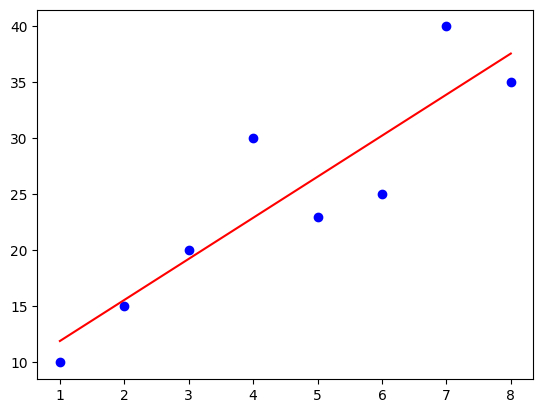

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]
y = [10,15,20,30,23,25,40,35]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

pinv = np.linalg.pinv(A)
beta = pinv.dot(y)

plt.plot(x,y, 'bo')
plt.plot(x, beta[0] * x + beta[1], 'r')
plt.show()


# Newton Rhapson

In [ ]:
import numpy as np

def f(x):
    return 7 * (x**3) - 4 * (x**2) - 5 * x + 5

def g(x):
    return 21 * (x**2) - 8 * x - 5

iter = 0
def newton_rhapson(x0, tolerance = 0.1):
    global iter
    iter += 1

    x1 = x0 - (f(x0) / g(x0))

    print(f"Iterasi ke {iter} : f({x1}) = {f(x1)}")

    if np.abs(f(x1)) <= tolerance:
        print(f"Root Found at {iter} : {x1}")
        return
    
    newton_rhapson(x1)

newton_rhapson(2)

# Riemann Integral

In [ ]:
import numpy as np

def f(x):
    return x**2 - 5

a = 2
b = 5
jumlah_titik = 5
lebar_kotak = (b-a) / (jumlah_titik-1)
x = np.linspace(a,b,jumlah_titik)
y = f(x)

left_Riemann = lebar_kotak * np.sum(y[0:jumlah_titik-1])
right_Riemann = lebar_kotak * np.sum(y[1:jumlah_titik])

x_mid = (x[0:jumlah_titik-1] + x[1: jumlah_titik]) / 2
y_mid = f(x_mid)
mid_Riemann = lebar_kotak * sum(y_mid)

trapezoid = (lebar_kotak / 2) * (y[0] + 2*sum(y[1:jumlah_titik-1]) + y[jumlah_titik-1])

print(left_Riemann)
print(right_Riemann)
print(mid_Riemann)
print(trapezoid)